# 出来高系オシレーター指標のデモ（ブログ用）

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import pandas_ta as ta
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## 指標値の計算

In [2]:
# 指標値の計算（pandas_ta利用）
def calculate_index(df):
    df["CMF"] = ta.cmf(df["High"], df["Low"], df["Close"], df["Volume"], length=21)
    df["ADL"] = ta.ad(df["High"], df["Low"], df["Close"], df["Volume"])
    df['EMV'] = ta.eom(df['High'], df['Low'], df['Close'], df['Volume'], length=14)
    df['OBV'] = ta.obv(df['Close'], df['Volume'])
    df["KVO"] = ta.kvo(df["High"], df["Low"], df["Close"], df["Volume"]).iloc[:,0]
    df['MFI'] = ta.mfi(df['High'], df['Low'], df['Close'], df['Volume'], length=14)
    df['EFI'] = ta.efi(df['Close'], df['Volume'], length=2)
    df["ADO"] = ta.adosc(df["High"], df["Low"], df["Close"], df["Volume"])
    return df

## 指標値の描画

In [3]:
 # --- Plotting --- 
def plot_indicators(df):
    plt.figure(figsize=(15, 10))    
    # Plot all 8 indicators in a single figure (including Force Index)
    plt.subplot(4, 2, 1)
    df['CMF'].plot(title='Chaikin Money Flow (CMF)', color='blue')       
    plt.subplot(4, 2, 2)
    df['ADL'].plot(title='Accumulation/Distribution Line (A/D Line)', color='green')   
    plt.subplot(4, 2, 3)
    df['EMV'].plot(title='Ease of Movement (EMV)', color='red')
    plt.subplot(4, 2, 4)
    df['OBV'].plot(title='On-Balance Volume (OBV)', color='purple')
    plt.subplot(4, 2, 5)
    df['KVO'].plot(title='Klinger Oscillator', color='orange')
    plt.subplot(4, 2, 6)
    df['MFI'].plot(title='Money Flow Index (MFI)', color='brown')
    plt.subplot(4, 2, 7)
    df['EFI'].plot(title='Elder Force Index (EFI)', color='magenta')
    plt.subplot(4, 2, 8)
    df['ADO'].plot(title='Accumulation Distribution Oscillator (ADO)', color='cyan')
    plt.tight_layout()
    plt.savefig('volume_index.png')
    plt.show()

## プログラム本体

In [4]:
# データの読み込み
ticker = '9432.T'
end_date = datetime.today()
start_date = end_date - timedelta(days=365)
# yahooサイトからデータをダウンロード
df = yf.download(ticker, start_date, end_date)
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-03-11,176.732468,179.348585,175.085293,179.348585,174603900
2024-03-12,175.279068,176.635576,174.407039,175.666648,157159400
2024-03-13,174.988403,175.957331,174.407041,175.279070,122312000
2024-03-14,176.151123,176.538688,174.600832,174.891514,119554300
2024-03-15,174.891510,176.248003,174.794611,174.891510,196363100


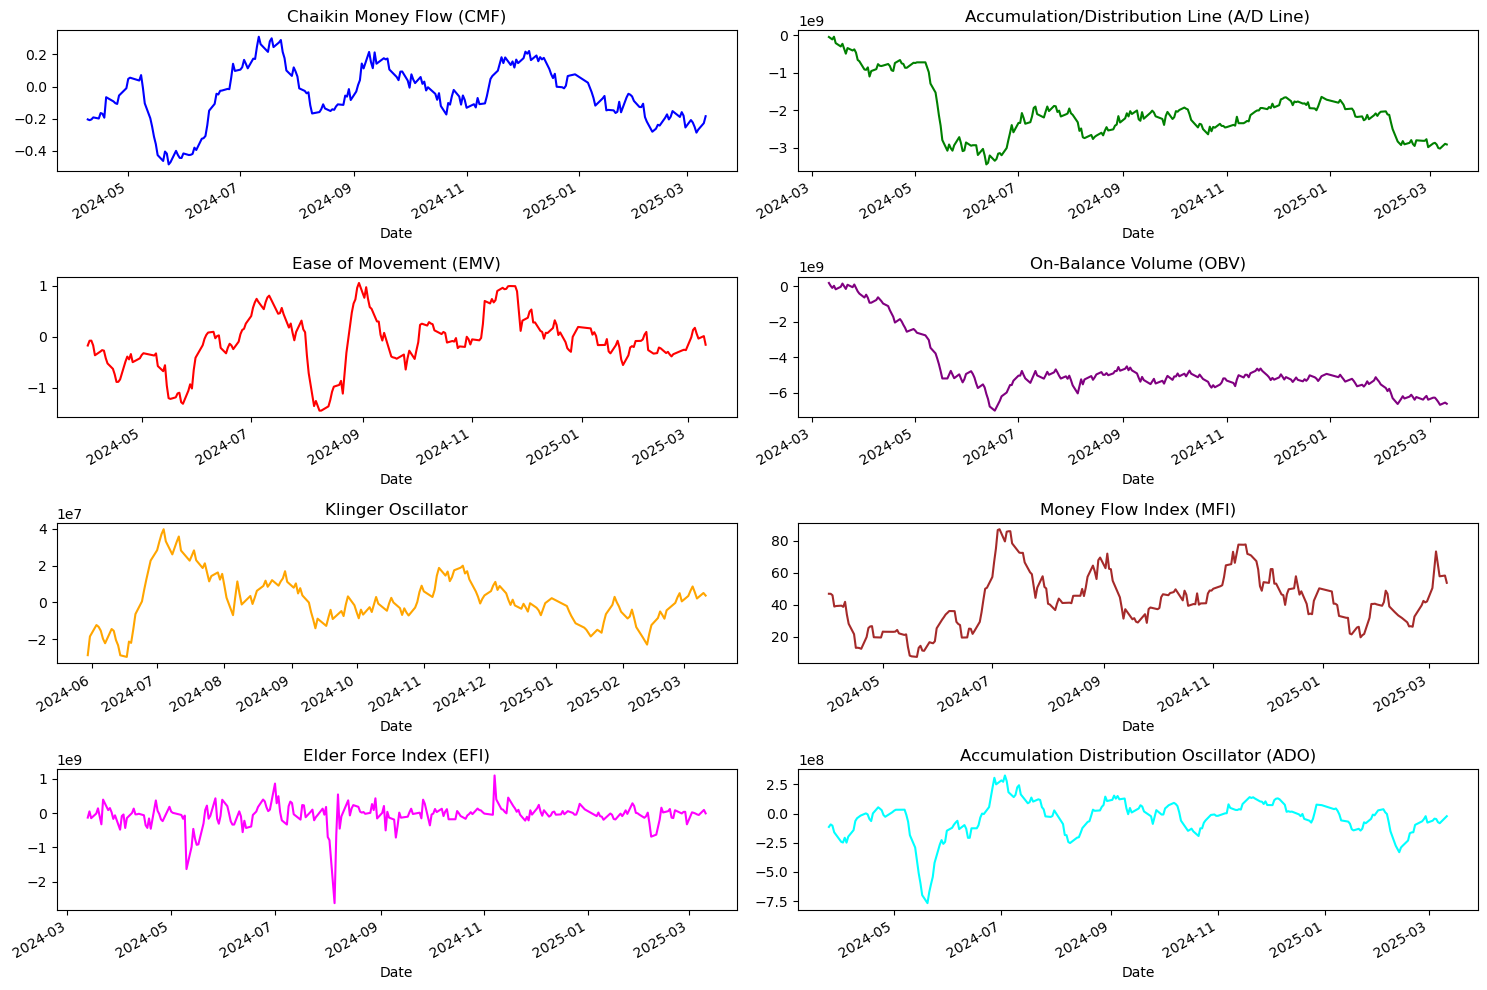

In [5]:
# calculate indicators
calculate_index(df)
# Plot the indicators on the same image
plot_indicators(df)